# Linear Regression

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
sess_config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))

### Data reading

In [3]:
def read_birth_life_data(filename):
    """Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:] #읽기모드 'r' https://wikidocs.net/26
    data = [line[:-1].split('\t') for line in text] # :-1 except last one - \n
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    return data, n_samples

In [4]:
DATA_FILE = '../datasets/birth_life_2010.txt'

data, n_samples = read_birth_life_data(DATA_FILE)

## Phase1 : Build a graph

In [5]:
# Step 2: create placeholders for X (birth rate) and Y (life expectancy)
# Remember both X and Y are scalars with type float
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [6]:
# Step 3: create weight and bias, initialized to 0.0
# Make sure to use tf.get_variable
# tf.Variable() 보다 tf.get_variable() 사용
w = tf.get_variable('weight', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

In [7]:
# Step 4: build model to predict Y
# e.g. how would you derive at Y_predicted given X, w, and b
Y_predicted = w * X + b

In [8]:
# Step 5: use the square error as the loss function
# loss function을 직접 구현하는 것 보다 `tf.losses`에 있는 함수를 쓰는 것을 권장함
#loss = tf.square(Y - Y_predicted, name='loss')
loss = tf.losses.mean_squared_error(Y, Y_predicted, scope='loss')

In [9]:
# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

## Phase 2 : Training a model using `tf.Session()`

In [10]:
start = time.time()
# Create a filewriter to write the model's graph to TensorBoard
writer = tf.summary.FileWriter('./graphs/01-1.linreg', tf.get_default_graph())

with tf.Session(config=sess_config) as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())
    
    # Step 8: train the model for 100 epochs
    for i in range(100):
        total_loss = 0
        for x, y in data:
            # Execute train_op and get the value of loss.
            # Don't forget to feed in data for placeholders
            _, loss_ = sess.run([optimizer, loss], feed_dict={X:x, Y:y}) #x, y scalar 그럼 optimizer x하나에 한 번?
            total_loss += loss_
        
        if (i + 1) % 10 == 0:
            print('Epoch {0}:{1}'.format(i+1, total_loss / n_samples))
        
    # close the writer when you're done using it
    writer.close()
    # Step 9: output the values of w and b
    w_out, b_out = sess.run([w, b])
    
print("Took: %f second" %(time.time() - start))

Epoch 10:375.45531067297253
Epoch 20:130.93503690609023
Epoch 30:59.19871881428714
Epoch 40:38.297008645340895
Epoch 50:32.28618434173986
Epoch 60:30.60122912194102
Epoch 70:30.153343991707324
Epoch 80:30.04828310612785
Epoch 90:30.032152204158926
Epoch 100:30.03552558278714
Took: 11.224818 second


### Plot the result

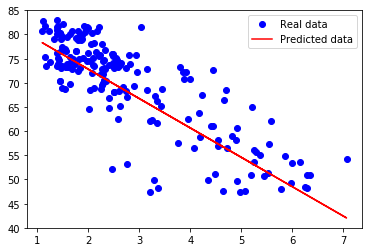

In [11]:
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()